In [ ]:
import numpy as np
from numpy import linalg as LA
import cv2
from skimage import img_as_float
import matplotlib.pyplot as plt

In [ ]:
image = img_as_float(cv2.imread('2SRDFHu.jpg'))
original_shape = image.shape
image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
init_norm = LA.norm(image_reshaped,'fro')

In [ ]:
U,s,V = LA.svd(image_reshaped,full_matrices=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


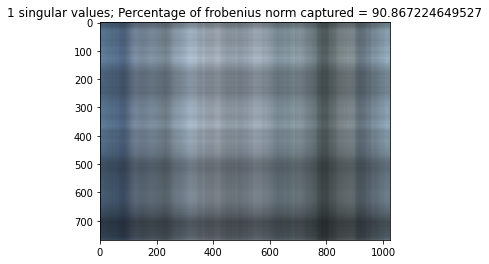

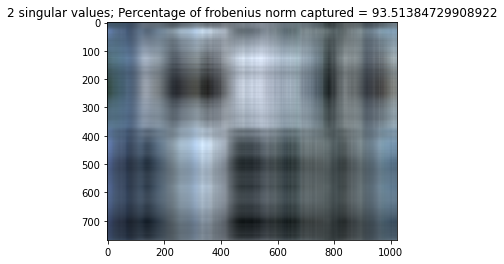

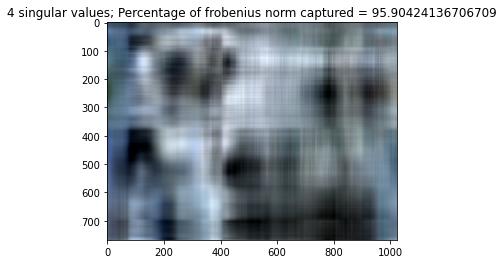

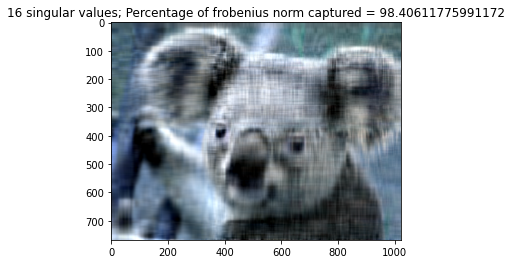

In [ ]:
for k in [1,2,4,16]:
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    fin_norm = LA.norm(reconst_matrix,'fro')
    perc = (fin_norm * 100)/init_norm
    image_reconst = reconst_matrix.reshape(original_shape)
    plt.figure()
    plt.title('{} singular values; Percentage of frobenius norm captured = {}'.format(k,perc))
    plt.imshow(image_reconst)